# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Halida Fiadnin
- **Email:** halidaafiadnin@gmail.com
- **ID Dicoding:** halidafi

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola pembelian pelanggan berdasarkan waktu?
2. Apakah ada kategori produk tertentu yang paling sering dibeli?
3. Apakah ada hubungan antara tren pembelian dan lokasi?
4. Apakah ada hubungan antara metode pembayaran dengan total nilai transaksi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Wrangling

### Gathering Data

In [3]:
#orders_dataset
orders_df = pd.read_csv(r"C:\Users\halid\Laskar-AI\submission-belajar-analis-data\data\orders_dataset.csv")

#order_items_dataset
order_items_df = pd.read_csv(r"C:\Users\halid\Laskar-AI\submission-belajar-analis-data\data\order_items_dataset.csv")

#order_payments_dataset
order_payments_df = pd.read_csv(r"C:\Users\halid\Laskar-AI\submission-belajar-analis-data\data\order_payments_dataset.csv")

#products_dataset
products_df = pd.read_csv(r"C:\Users\halid\Laskar-AI\submission-belajar-analis-data\data\products_dataset.csv")

#product_category_name_translation
product_category_name_translation_df = pd.read_csv(r"C:\Users\halid\Laskar-AI\submission-belajar-analis-data\data\product_category_name_translation.csv")

#customers_dataset
customers_df = pd.read_csv(r"C:\Users\halid\Laskar-AI\submission-belajar-analis-data\data\customers_dataset.csv")

### Assesing Data

#### assesing data masing-masing dataset

##### orders_dataset

In [4]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
print("jumlah duplikasi data: ", orders_df.duplicated().sum())

jumlah duplikasi data:  0


**Insight:**

- orders_dataset **memiliki missing value** pada beberapa atribut seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.
- orders_dataset **tidak memiliki duplikasi data**.

##### order_items_dataset

In [8]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [11]:
print("jumlah duplikasi data: ", order_items_df.duplicated().sum())

jumlah duplikasi data:  0


**Insight:**

- order_items_dataset **tidak memiliki missing value**
- order_items_dataset **tidak memiliki duplikasi data**.

##### order_payments_df

In [12]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [14]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [15]:
print("jumlah duplikasi data: ", order_payments_df.duplicated().sum())

jumlah duplikasi data:  0


**Insight:**

- order_payments_dataset **tidak memiliki missing value**
- order_payments_dataset **tidak memiliki duplikasi data**.

##### products_dataset

In [16]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
print("jumlah duplikasi data: ", products_df.duplicated().sum())

jumlah duplikasi data:  0


**Insight:**

- products_dataset **memiliki missing value** pada beberapa atribut seperti product_category_name, product_category_lenght, dan lainnya.
- products_dataset **tidak memiliki duplikasi data**.

##### product_category_name_translation

In [20]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [21]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [22]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [23]:
print("jumlah duplikasi data: ", product_category_name_translation_df.duplicated().sum())

jumlah duplikasi data:  0


**Insight:**

- products_category_name_translation **tidak memiliki missing value**.
- products_category_name_translation **tidak memiliki duplikasi data**.

##### customers_dataset

In [24]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [25]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [26]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [27]:
print("jumlah duplikasi data: ", customers_df.duplicated().sum())

jumlah duplikasi data:  0


**Insight:**

- customers_dataset **tidak memiliki missing value**.
- customers_dataset **tidak memiliki duplikasi data**.

##### kesimpulan data_assesing

In [28]:
data_assesing = {
    "dataset": [
        "orders_df", "order_items_df", "order_payments_df",
        "products_df", "product_category_name_translation_df",
       "customers_df"
    ],
    "isna": ["ya", "tidak", "tidak", "ya", "tidak", "tidak"],
    "duplikat": ["tidak", "tidak", "tidak", "tidak", "tidak", "tidak"]
}
summary_assesing = pd.DataFrame(data_assesing)

#### **Kesimpulan dari assesing data**

In [29]:
summary_assesing

,dataset,isna,duplikat
0,orders_df,ya,tidak
1,order_items_df,tidak,tidak
2,order_payments_df,tidak,tidak
3,products_df,ya,tidak
4,product_category_name_translation_df,tidak,tidak
5,customers_df,tidak,tidak


**Insight:**
- terdapat missing value pada dataset **orders_df** dan **products_df**.
- tidak terdapat duplikasi data pada dataset manapun.

### Cleaning Data

#### Cleaning data pada orders_df

In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**penjelasan:**

pada orders_df, terdapat 3 atribut yang memiliki missing value. untuk menanganinya, 
- **order_approved_at** bisa diisi dengan waktu saat pembelian (order_purchase_timestamp) sebagai perkiraan
- **order_delivered_carrier_date** bisa diisi dengan tanggal perkiraan rata-rata setelah approved
- **order_delivered_customer_date** bisa diisi dengan estimasi waktu pengiriman rata-rata

sebenarnya, order_delivered_carrier_date yang kosong bisa jadi disebabkan karena pesanan tidak pernah dikirim ke kurir.
atau dengan kata lain, bukanlah "delivered" tetapi "canceled" atau "processing".
begitu juga dengan order_delivered_customer_date yang kosong bisa jadi disebabkan karena pesanan belum dikirim, atau pesanan dibatalkan.

In [32]:
# mengisi missing value order_approved_at
orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"], inplace=True)

**penjelasan:**
- untuk melakukan perhitungan tanggal pengiriman rata-rata dan waktu pengiriman rata-rata, atribut perlu diubah tipe datanya menjadi "datetime"

In [33]:
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"])
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])

In [34]:
# mengisi missing value pada order_delivered_carrier_date
avg_shipping_time = (orders_df["order_delivered_carrier_date"] - orders_df["order_approved_at"]).median()
orders_df["order_delivered_carrier_date"].fillna(orders_df["order_approved_at"] + avg_shipping_time, inplace=True)

In [35]:
# mengisi missing value pada order_delivered_customer_date
avg_delivery_time = (orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]).median()
orders_df["order_delivered_customer_date"].fillna(orders_df["order_delivered_carrier_date"] + avg_delivery_time, inplace=True)

In [36]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [37]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


**Insight:**
- pengisian missing value pada 3 atribut berhasil dilakukan.
- terdapat perubahan tipe data dari object menjadi datetime pada 3 atribut tersebut.

#### cleaning data pada products_df

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**penjelasan:**

pada orders_df, terdapat **8 atribut** yang memiliki missing value. untuk menanganinya, 
- **product_category_name** dapat diisi dengan "unknown"
- untuk **7 atribut lainnya** dapat diisi dengan median / rata-ratanya.

secara umum, untuk data kuantitatif kita dapat menggantinya dengan nilai median atau rata-rata supaya tidak terpengaruh oleh outlier.

In [40]:
# menangani missing value product_category_name
products_df["product_category_name"].fillna("unknown", inplace=True)

In [41]:
# menangan missing value data kuantitatif
products_df["product_name_lenght"].fillna(products_df["product_name_lenght"].median(), inplace=True)
products_df["product_description_lenght"].fillna(products_df["product_description_lenght"].median(), inplace=True)
products_df["product_photos_qty"].fillna(products_df["product_photos_qty"].median(), inplace=True)
products_df["product_weight_g"].fillna(products_df["product_weight_g"].median(), inplace=True)
products_df["product_length_cm"].fillna(products_df["product_length_cm"].median(), inplace=True)
products_df["product_height_cm"].fillna(products_df["product_height_cm"].median(), inplace=True)
products_df["product_width_cm"].fillna(products_df["product_width_cm"].median(), inplace=True)

In [42]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [43]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- pengisian missing value pada 8 atribut berhasil dilakukan.

## Exploratory Data Analysis (EDA)

### Explore masing-masing dataset

#### **orders_df**

In [44]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,NaN,NaN,NaN,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,NaN,NaN,NaN,2017-12-20 00:00:00
freq,1,1,96478,3,NaN,NaN,NaN,522
mean,NaN,NaN,NaN,NaN,2017-12-31 19:07:21.164720896,2018-01-03 14:01:32.574989056,2018-01-12 20:22:20.863225344,NaN
min,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-06 06:06:04.500000,2016-10-11 13:46:32,NaN
25%,NaN,NaN,NaN,NaN,2017-09-12 21:55:13,2017-09-14 20:29:30,2017-09-22 19:22:41,NaN
50%,NaN,NaN,NaN,NaN,2018-01-19 11:54:30,2018-01-23 17:18:57,2018-02-01 12:03:58,NaN
75%,NaN,NaN,NaN,NaN,2018-05-04 23:50:21,2018-05-08 09:09:00,2018-05-15 16:26:01,NaN
max,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-19 13:09:42.500000,2018-10-26 15:33:22.500000,NaN


In [45]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

##### Insight:

- pada orders_status dapat dilihat bahwa mayoritas pesanan berhasil dikirim (delivered), terdapat beberapa yang masih dalam pengiriman (shipped) dan ada juga order yang dibatalkan (canceled).

#### **order_items_df**

In [46]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [47]:
order_items_df["order_id"].value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [48]:
order_items_df.groupby(by="product_id").agg({
    "order_id": "count",
    "price": ["max", "min", "mean", "std"]
}).sort_values(by=("order_id", "count"), ascending=False)


order_id   price                      \
                                    count     max     min        mean   
product_id                                                              
aca2eb7d00ea1a7b8ebd4e68314663af      527  109.90   69.90   71.364137   
99a4788cb24856965c36a24e339b6058      488   89.90   74.00   88.167131   
422879e10f46682990de24d770e7f83d      484   59.90   49.00   54.911612   
389d119b48cf3043d311335e499d9c6b      392   59.90   49.00   54.695383   
368c6c730842d78016ad823897a372db      388   59.90   49.00   54.270103   
...                                   ...     ...     ...         ...   
6ca99f05e9c1952a6597264e87f01378        1  185.00  185.00  185.000000   
6ca54e191592a843087a042b0665d7ef        1  189.00  189.00  189.000000   
6ca5428af5edb5066b1966ad58501b60        1   70.00   70.00   70.000000   
6ca32b4631431cb1fe976880797a0f5c        1  130.00  130.00  130.000000   
fffe9eeff12fcbd74a2f2b007dde0c58        1  249.99  249.99  249.990000   

                                            
                                       std  
product_id                                  
aca2eb7d00ea1a7b8ebd4e68314663af  3.670723  
99a4788cb24856965c36a24e339b6058  3.489328  
422879e10f46682990de24d770e7f83d  4.372601  
389d119b48cf3043d311335e499d9c6b  4.524637  
368c6c730842d78016ad823897a372db  4.484718  
...                                    ...  
6ca99f05e9c1952a6597264e87f01378       NaN  
6ca54e191592a843087a042b0665d7ef       NaN  
6ca5428af5edb5066b1966ad58501b60       NaN  
6ca32b4631431cb1fe976880797a0f5c       NaN  
fffe9eeff12fcbd74a2f2b007dde0c58       NaN  

[32951 rows x 5 columns]

##### Insight:

- pada orders_items_df kita dapat melihat berapa banyak jumlah item yang dipesan dalam satu kali pesanan.
- terlihat bahwa ada 1 order yang memesan 21 item sekaligus dalam 1 order yang sama.
- selain itu kita juga dapat melihat banyaknya product yang dipesan.
- produk yang paling banyak dipesan yaitu dengan product_id aca2eb7d00ea1a7b8ebd4e68314663af sebanyak 527 item yang dipesan.
- kita juga dapat melihat range harga masing-masing produk saat dijual. Beberapa produk memiliki harga yang berbeda (mungkin ada yang melakukan pemesanan saat diskon atau menggunakan voucher), tetapi terdapat banyak produk yang juga memiliki harga yang tetap sama.

#### **order_payments_df**

In [49]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [50]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "count",
    "payment_value": ["max", "min", "mean", "std"]
}).sort_values(by=("order_id", "count"), ascending=False)

order_id payment_value                               
                count           max    min        mean         std
payment_type                                                      
credit_card     76795      13664.08   0.01  163.319021  222.119311
boleto          19784       7274.88  11.62  145.034435  213.581061
voucher          5775       3184.34   0.00   65.703354  115.519185
debit_card       1529       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000

In [51]:
order_payments_df["payment_installments"].value_counts().sort_index()

payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64

In [52]:
installment_table = pd.crosstab(
    index=order_payments_df["payment_type"],
    columns=order_payments_df["payment_installments"]
)

installment_table.loc["count"] = installment_table.sum()
installment_table

payment_installments,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,20,21,22,23,24
payment_type,,,,,,,,,,,,,,,,,,,,,
boleto,0,19784,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
credit_card,2,25455,12413,10461,7098,5239,3920,1626,4268,644,...,15,74,5,8,27,17,3,1,1,18
debit_card,0,1529,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
not_defined,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
voucher,0,5775,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count,2,52546,12413,10461,7098,5239,3920,1626,4268,644,...,15,74,5,8,27,17,3,1,1,18


##### Insight:

- pada orders_payments_df dapat dilihat bahwa tipe pembayaran yang paling banyak adalah "credit card" sejumlah 76795 order, diikuti boleto sebanyak 19784, lalu voucher sebanyak 5775.
- dapat dilihat juga pada nilai rata-rata total harga pembelian (mean of payment_value), bahwa nilai terbesar ada pada credit card, dan nilai terkecil ada pada voucher.
- untuk payment installment terbanyak ada pada nilai 1, yang artinya kebanyakan customer langsung membayar lunas tanpa cicilan.
- namun ada juga beberapa customer yang melakukan cicilan, tercatat cicilan paling banyak yaitu 24x cicilan.
- lebih lanjut, cicilan ini selalu dibayarkan dengan metode payment credit card.

#### **orders_df & orders_items_df & orders_payments_df => orders_all_df**

In [53]:
orders_and_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_and_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [54]:
orders_all_df = pd.merge(
    left=orders_and_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12


In [55]:
orders_all_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    830
product_id                       830
seller_id                        830
shipping_limit_date              830
price                            830
freight_value                    830
payment_sequential                 3
payment_type                       3
payment_installments               3
payment_value                      3
dtype: int64

In [56]:
order_items_atribut = [
    'order_item_id', 'product_id', 'seller_id',
    'shipping_limit_date', 'price', 'freight_value'
]

order_items_missing = orders_all_df[orders_all_df[order_items_atribut].isna().any(axis=1)]
order_items_missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
319,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,2017-11-18 11:06:21.500,2017-11-25 13:30:01.500,2017-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,5.0,84.00
700,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,2018-02-02 10:03:14.500,2018-02-09 12:26:54.500,2018-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,97.68
821,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,2017-08-18 19:54:42.500,2017-08-25 22:18:22.500,2017-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,132.46
880,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,2018-01-11 03:05:32.500,2018-01-18 05:29:12.500,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,134.38
1352,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-08-30 11:06:03.500,2018-09-06 13:29:43.500,2018-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118205,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,2018-01-18 23:16:58.500,2018-01-26 01:40:38.500,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,210.09
118237,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,2018-09-02 11:53:08.500,2018-09-09 14:16:48.500,2018-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,63.89
118330,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,2018-09-08 14:25:11.500,2018-09-15 16:48:51.500,2018-09-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,107.13
118331,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-08-30 11:24:11.500,2017-09-06 13:47:51.500,2017-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,2.0,195.91


In [57]:
order_items_missing.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_id, dtype: int64

**penjelasan:**

- pada gabungan orders_df, order_items_df, dan order_payments_df terlihat bahwa terdapat beberapa baris yang memiliki missing values.
- untuk atribut 'order_item_id', 'product_id', 'seller_id','shipping_limit_date', 'price', 'freight_value' **yang memiliki 830 missing value** setelah dilihat "order_status" nampak bahwa baris-baris tersebut adalah order yang **unavailable/canceled/created/invoiced/shipped** dan bukan yang delivered, sehingga wajar jika terdapat missing values.

In [58]:
order_payments_atribut = [
    'payment_sequential', 'payment_type',
    'payment_installments', 'payment_value'
]

order_payments_missing = orders_all_df[orders_all_df[order_payments_atribut].isna().any(axis=1)]
order_payments_missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
36657,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN
36658,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN
36659,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN


In [59]:
order_payments_missing.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered    1
Name: order_id, dtype: int64

**penjelasan:**

- sementara itu, untuk atribut 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value' **yang memiliki 3 missing value**, ketiganya berada pada order_id yang sama, dan order_status nya adalah "delivered", maka dari itu kemungkinan adanya lost data untuk order_id tersebut, **akan diisi dengan nilai rata-rata atau median** dari atribut.

In [60]:
# Mengisi missing value dengan mean
orders_all_df['payment_sequential'] = orders_all_df['payment_sequential'].fillna(orders_all_df['payment_sequential'].mean())
orders_all_df['payment_installments'] = orders_all_df['payment_installments'].fillna(orders_all_df['payment_installments'].mean())
orders_all_df['payment_value'] = orders_all_df['payment_value'].fillna(orders_all_df['payment_value'].mean())

# Mengisi payment_type dengan modus (nilai yang paling sering muncul)
most_common_payment_type = orders_all_df['payment_type'].mode()[0]
orders_all_df['payment_type'] = orders_all_df['payment_type'].fillna(most_common_payment_type)

In [61]:
orders_all_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    830
product_id                       830
seller_id                        830
shipping_limit_date              830
price                            830
freight_value                    830
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
dtype: int64

##### Insight:

- pada gabungan orders_df, order_items_df, dan order_payments_df terlihat bahwa terdapat beberapa baris yang memiliki missing values.
- untuk atribut 'order_item_id', 'product_id', 'seller_id','shipping_limit_date', 'price', 'freight_value' **yang memiliki 830 missing value** setelah dilihat "order_status" nampak bahwa baris-baris tersebut adalah order yang **unavailable/canceled/created/invoiced/shipped** dan bukan yang delivered, sehingga wajar jika terdapat missing values.
- - sementara itu, untuk atribut 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value' **yang memiliki 3 missing value**, ketiganya berada pada order_id yang sama, dan order_status nya adalah "delivered", maka dari itu kemungkinan adanya lost data untuk order_id tersebut, **diisi dengan nilai rata-rata atau median** dari atribut.

#### **customers_df**

In [62]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [63]:
customers_df.groupby(by="customer_state").agg({
    "customer_city": "nunique",
    "customer_id": "nunique"
}).sort_values(by=("customer_id"), ascending=False)


,customer_city,customer_id
customer_state,,
SP,629,41746
RJ,149,12852
MG,745,11635
RS,379,5466
PR,364,5045
SC,240,3637
BA,353,3380
DF,6,2140
ES,95,2033


In [64]:
customers_df.groupby(by="customer_state").agg({
    "customer_city": "nunique",
    "customer_id": "nunique"
}).sort_values(by=("customer_city"), ascending=False)


,customer_city,customer_id
customer_state,,
MG,745,11635
SP,629,41746
RS,379,5466
PR,364,5045
BA,353,3380
SC,240,3637
GO,178,2020
CE,161,1336
PE,152,1652


##### Insight:

- dari customers_df kita mengetahui bahwa terdapat **27 state** yang berbeda dengan total keseluruhan **4119 kota**.
- state yang memiliki customer terbanyak adalah SP dengan total 41746 customer, diikuti state RJ dan MG
- state yang memiliki jumlah kota paling banyak (pada data customer) adalah MG dengan total 745 kota, diikuti oleh SP dan RS

#### **orders_all_df & customers_df => order_cust_df**

In [65]:
order_cust_df = pd.merge(
    left=orders_all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_cust_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [66]:
order_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  object        
 4   order_approved_at              118434 non-null  datetime64[ns]
 5   order_delivered_carrier_date   118434 non-null  datetime64[ns]
 6   order_delivered_customer_date  118434 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118434 non-null  object        
 8   order_item_id                  117604 non-null  float64       
 9   product_id                     117604 non-null  object        
 10  seller_id                      117604 non-null  object        
 11  

In [67]:
order_cust_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    830
product_id                       830
seller_id                        830
shipping_limit_date              830
price                            830
freight_value                    830
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

In [68]:
print("data duplikat: ", order_cust_df.duplicated().sum())

data duplikat:  0


##### Insight:

- pada data gabungan order (keseluruhan) dan customer ini tidak ada missing value (selain dari data frame orders_and_items_df yang sudah dibahas sebelumnya) dan tidak ada data duplikat

#### **products_df & product_category_name_translation => products_translation_df**

In [69]:
products_translation_df = pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

new_column_order = [
    "product_id", 
    "product_category_name", 
    "product_category_name_english",  # Pindahkan ke posisi ketiga
    "product_name_lenght", 
    "product_description_lenght", 
    "product_photos_qty", 
    "product_weight_g", 
    "product_length_cm", 
    "product_height_cm", 
    "product_width_cm"
]

# Reorder dataframe
products_translation_df = products_translation_df[new_column_order]

In [70]:
products_translation_df

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [71]:
products_translation_df.describe(include="all")

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32328,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [72]:
products_translation_df.isna().sum()

product_id                         0
product_category_name              0
product_category_name_english    623
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
dtype: int64

In [73]:
# mencari kategori yang tidak memiliki terjemahan
missing_translations = products_translation_df[products_translation_df['product_category_name_english'].isna()]
print(missing_translations[['product_category_name']].drop_duplicates())

                              product_category_name
105                                         unknown
1628                                       pc_gamer
5821  portateis_cozinha_e_preparadores_de_alimentos


**penjelasan:**

setelah dilakukan penggabungan antara products_df dan product_category_name_translation_df, ternyata ada **beberapa produk yang tidak memiliki padanan bahasa inggrisnya** yaitu untuk **"unknown"**, **"pc_gamer"**, dan **"portateis_cozinha_e_preparadores_de_alimentos"** yang menyebabkan data frame baru memiliki missing value. Oleh sebab itu, kita akan mengisi padanan bahasa inggrisnya sesuai dengan nama aslinya.

In [74]:
# mengisi missing value di product_category_name_english dengan nilai dari product_category_name
products_translation_df['product_category_name_english'] = products_translation_df['product_category_name_english'].fillna(products_translation_df['product_category_name'])

products_translation_df.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [75]:
products_translation_df.describe(include="all")

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**penjelasan:**

fillna berhasil dilakukan, jumlah unique pada product_category_name dan product_category_name_english sekarang berjumlah sama.

In [76]:
products_translation_df.groupby(by="product_category_name_english").agg({
    "product_id": "count",
    "product_weight_g": ["max", "min", "mean", "std"]
}).sort_values(by=("product_id", "count"), ascending=False)


product_id product_weight_g                      \
                                   count              max    min         mean   
product_category_name_english                                                   
bed_bath_table                      3029          40425.0    0.0  2456.405084   
sports_leisure                      2867          30000.0   50.0  2024.670736   
furniture_decor                     2657          30000.0    2.0  3008.266842   
health_beauty                       2444          30000.0   50.0  1434.793781   
housewares                          2335          30000.0   50.0  3020.793576   
...                                  ...              ...    ...          ...   
fashion_childrens_clothes              5            600.0  100.0   324.000000   
home_comfort_2                         5           3750.0  425.0  1467.600000   
pc_gamer                               3           2839.0  650.0  1429.666667   
security_and_services                  2           1225.0  400.0   812.500000   
cds_dvds_musicals                      1            550.0  550.0   550.000000   

                                            
                                       std  
product_category_name_english               
bed_bath_table                 3732.667484  
sports_leisure                 3973.126852  
furniture_decor                4713.454728  
health_beauty                  3848.294144  
housewares                     4737.014341  
...                                    ...  
fashion_childrens_clothes       223.338308  
home_comfort_2                 1382.339068  
pc_gamer                       1222.820646  
security_and_services           583.363094  
cds_dvds_musicals                      NaN  

[74 rows x 5 columns]

##### Insight:

dapat dilihat dari gabungan data frame products_df dan product_category_name_translation bahwa:
- kategori dengan produk terbanyak yaitu **bed_bath_table** dengan jumlah 3029 produk, diikuti oleh esporte_lazer dan moveis, decoracao.
- berat dari masing-masing produk pada kategori yang sama juga bervariasi.

### Explore gabungan semua dataset

In [77]:
all_dataset_df = pd.merge(
    left=order_cust_df,
    right=products_translation_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,BA,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,GO,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0


In [78]:
all_dataset_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    830
product_id                       830
seller_id                        830
shipping_limit_date              830
price                            830
freight_value                    830
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
product_category_name            830
product_category_name_english    830
product_name_lenght              830
product_description_lenght       830
product_photos_qty               830
p

In [79]:
product_atribut = [
    'product_category_name', 'product_category_name_english', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]

product_missing = all_dataset_df[all_dataset_df[product_atribut].isna().any(axis=1)]
product_missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
319,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,2017-11-18 11:06:21.500,2017-11-25 13:30:01.500,2017-12-05 00:00:00,NaN,NaN,...,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,2018-02-02 10:03:14.500,2018-02-09 12:26:54.500,2018-02-16 00:00:00,NaN,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,2017-08-18 19:54:42.500,2017-08-25 22:18:22.500,2017-09-05 00:00:00,NaN,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,2018-01-11 03:05:32.500,2018-01-18 05:29:12.500,2018-02-06 00:00:00,NaN,NaN,...,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-08-30 11:06:03.500,2018-09-06 13:29:43.500,2018-09-12 00:00:00,NaN,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118205,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,2018-01-18 23:16:58.500,2018-01-26 01:40:38.500,2018-02-06 00:00:00,NaN,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118237,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,2018-09-02 11:53:08.500,2018-09-09 14:16:48.500,2018-10-01 00:00:00,NaN,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118330,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,2018-09-08 14:25:11.500,2018-09-15 16:48:51.500,2018-09-27 00:00:00,NaN,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118331,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-08-30 11:24:11.500,2017-09-06 13:47:51.500,2017-09-15 00:00:00,NaN,NaN,...,RJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
product_missing.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_id, dtype: int64

**penjelasan:**

- pada gabungan semua dataset terdapat beberapa atribut yang memiliki missing values.
- setelah diteliti, atribut yang memiliki missing value tersebut memiliki "order_status" **unavailable/canceled/created/invoiced/shipped** dan bukan yang delivered, sehingga wajar jika terdapat missing values.
- tetapi karena missing value ini akan berpengaruh pada visualisasi, maka kita **hilangkan baris yang memiliki missing value**.

In [99]:
all_dataset_df.dropna(inplace=True)

In [102]:
all_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_month
count,117604,117604,117604,117604,117604,117604,117604,117604,117604.000000,117604,...,117604,117604,117604.000000,117604.000000,117604.00000,117604.000000,117604.000000,117604.000000,117604.000000,117604
unique,98666,98666,7,NaN,NaN,NaN,NaN,450,NaN,32951,...,74,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,cama_mesa_banho,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11
freq,63,63,115038,NaN,NaN,NaN,NaN,649,NaN,536,...,11823,11823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9016
mean,NaN,NaN,NaN,2017-12-30 16:02:17.419356928,2017-12-31 02:31:54.756232448,2018-01-02 22:46:30.339584768,2018-01-12 02:29:47.183641600,NaN,1.195920,NaN,...,NaN,NaN,48.799446,784.185767,2.19041,2114.040551,30.255978,16.629672,23.067872,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-06 09:48:02.500000,2016-10-11 13:46:32,NaN,1.000000,NaN,...,NaN,NaN,5.000000,4.000000,1.00000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,NaN,2017-09-11 21:23:29,2017-09-12 08:50:20.750000128,2017-09-14 16:35:55.500000,2017-09-21 21:40:47.249999872,NaN,1.000000,NaN,...,NaN,NaN,43.000000,348.000000,1.00000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,NaN,2018-01-18 13:33:08,2018-01-18 19:43:29.500000,2018-01-23 00:24:09,2018-01-31 21:12:29,NaN,1.000000,NaN,...,NaN,NaN,51.000000,595.000000,1.00000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,NaN,2018-05-03 22:41:39.500000,2018-05-04 11:33:19,2018-05-07 15:03:00,2018-05-14 21:05:43,NaN,1.000000,NaN,...,NaN,NaN,57.000000,979.000000,3.00000,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN,21.000000,NaN,...,NaN,NaN,76.000000,3992.000000,20.00000,40425.000000,105.000000,105.000000,118.000000,NaN


In [103]:
all_dataset_df.groupby(by="customer_state").agg({
    "payment_value": ["sum", "max", "min", "mean", "std"],
    "order_id": "count"
}).sort_values(by=("payment_value", "sum"), ascending=False)

payment_value                                          order_id
                         sum       max    min        mean         std    count
customer_state                                                                
SP              7.597728e+06   6726.66   0.01  153.275802  211.965460    49569
RJ              2.769347e+06  13664.08   0.00  180.684246  386.320842    15327
MG              2.326152e+06   6081.54   0.01  170.563986  246.300526    13638
RS              1.147277e+06   2455.12   0.08  176.885137  224.282354     6486
PR              1.064604e+06   3126.50   0.03  178.564909  242.067668     5962
BA              7.974104e+05   3358.24   0.10  196.988725  292.516800     4048
SC              7.863437e+05   3666.42   0.34  182.785614  250.460947     4302
GO              5.138790e+05   4809.44   0.00  211.472840  341.287686     2430
DF              4.326237e+05   3736.22   0.67  174.938831  236.641366     2473
ES              4.058053e+05   7274.88   0.00  173.569435  365.559099     2338
PE              3.763773e+05   3792.59   0.52  199.246834  250.172228     1889
CE              3.438478e+05   2734.11   0.52  221.694281  265.161622     1551
PA              2.617884e+05   4042.74   2.31  234.577375  283.319781     1116
MT              2.568046e+05   3242.84   0.00  228.270773  350.211032     1125
MA              1.985663e+05   3195.73   1.70  235.268092  356.222702      844
PB              1.809842e+05   4681.78   1.21  283.230344  438.193203      639
MS              1.643373e+05   6929.31   1.74  194.943393  334.066909      843
PI              1.367800e+05   1989.75   3.35  238.708482  287.061649      573
RN              1.162649e+05   1821.82   5.43  204.331986  240.422315      569
AL              1.112844e+05   2269.98   1.33  242.979083  292.593885      458
SE              8.843751e+04   1729.98   0.39  222.764509  244.268999      397
TO              7.228117e+04   2784.16   1.93  213.218791  276.299652      339
RO              6.588600e+04   2452.12   3.29  230.370629  283.621155      286
AM              3.475330e+04   1853.75   0.66  203.235673  239.680261      171
AC              2.498486e+04   1251.70  11.58  262.998526  228.817105       95
AP              2.164270e+04   1482.42  34.80  257.651190  288.714169       84
RR              1.246221e+04    994.77  39.03  239.657885  218.693474       52

In [104]:
all_dataset_df.groupby("customer_state")["product_category_name_english"] \
    .apply(lambda x: x.mode().iloc[0]) \
    .reset_index(name="most_common_category")

,customer_state,most_common_category
0,AC,furniture_decor
1,AL,health_beauty
2,AM,health_beauty
3,AP,computers_accessories
4,BA,health_beauty
5,CE,health_beauty
6,DF,health_beauty
7,ES,bed_bath_table
8,GO,bed_bath_table
9,MA,health_beauty


In [105]:
most_common = [
    'bed_bath_table', 'computers_accessories', 'health_beauty', 'sports_leisure'
]
filtered_df = all_dataset_df[all_dataset_df['product_category_name_english'].isin(most_common)]

In [106]:
product_count_table = pd.pivot_table(
    filtered_df,
    index="customer_state",
    columns="product_category_name_english",
    values="order_id",
    aggfunc="count",
    fill_value=0
)
product_count_table.loc['Total'] = product_count_table.sum()

product_count_table

product_category_name_english,bed_bath_table,computers_accessories,health_beauty,sports_leisure
customer_state,,,,
AC,4,9,7,9
AL,20,41,66,34
AM,9,20,21,13
AP,6,10,10,8
BA,278,268,394,307
CE,89,101,174,95
DF,217,168,252,225
ES,240,158,168,180
GO,246,126,232,173


**Insight:**
- Pada dataset gabungan, diketahui bahwa **state dengan jumlah pengeluaran uang paling banyak** yaitu SP, diikuti RJ dan MG. Hal ini sebanding dengan banyaknya order_id pada state tersebut.
- masing-masing state memiliki barang yang paling sering dibeli, terdapat satu kategori yang cukup populer (banyak dibeli) di banyak state yaitu "health_beauty", meskipun secara total pembelian untuk kategori "bed_bath_table" lebih banyak dibeli.

## Visualization & Explanatory Analysis

In [107]:
all_dataset_df['order_purchase_timestamp'] = pd.to_datetime(all_dataset_df['order_purchase_timestamp'], errors='coerce')

In [108]:
all_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_month
count,117604,117604,117604,117604,117604,117604,117604,117604,117604.000000,117604,...,117604,117604,117604.000000,117604.000000,117604.00000,117604.000000,117604.000000,117604.000000,117604.000000,117604
unique,98666,98666,7,NaN,NaN,NaN,NaN,450,NaN,32951,...,74,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,cama_mesa_banho,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11
freq,63,63,115038,NaN,NaN,NaN,NaN,649,NaN,536,...,11823,11823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9016
mean,NaN,NaN,NaN,2017-12-30 16:02:17.419356928,2017-12-31 02:31:54.756232448,2018-01-02 22:46:30.339584768,2018-01-12 02:29:47.183641600,NaN,1.195920,NaN,...,NaN,NaN,48.799446,784.185767,2.19041,2114.040551,30.255978,16.629672,23.067872,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-06 09:48:02.500000,2016-10-11 13:46:32,NaN,1.000000,NaN,...,NaN,NaN,5.000000,4.000000,1.00000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,NaN,2017-09-11 21:23:29,2017-09-12 08:50:20.750000128,2017-09-14 16:35:55.500000,2017-09-21 21:40:47.249999872,NaN,1.000000,NaN,...,NaN,NaN,43.000000,348.000000,1.00000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,NaN,2018-01-18 13:33:08,2018-01-18 19:43:29.500000,2018-01-23 00:24:09,2018-01-31 21:12:29,NaN,1.000000,NaN,...,NaN,NaN,51.000000,595.000000,1.00000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,NaN,2018-05-03 22:41:39.500000,2018-05-04 11:33:19,2018-05-07 15:03:00,2018-05-14 21:05:43,NaN,1.000000,NaN,...,NaN,NaN,57.000000,979.000000,3.00000,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN,21.000000,NaN,...,NaN,NaN,76.000000,3992.000000,20.00000,40425.000000,105.000000,105.000000,118.000000,NaN


In [110]:
all_dataset_df.to_csv("main_data_df.csv", index=False)

### Pertanyaan 1: Bagaimana pola pembelian pelanggan berdasarkan waktu?

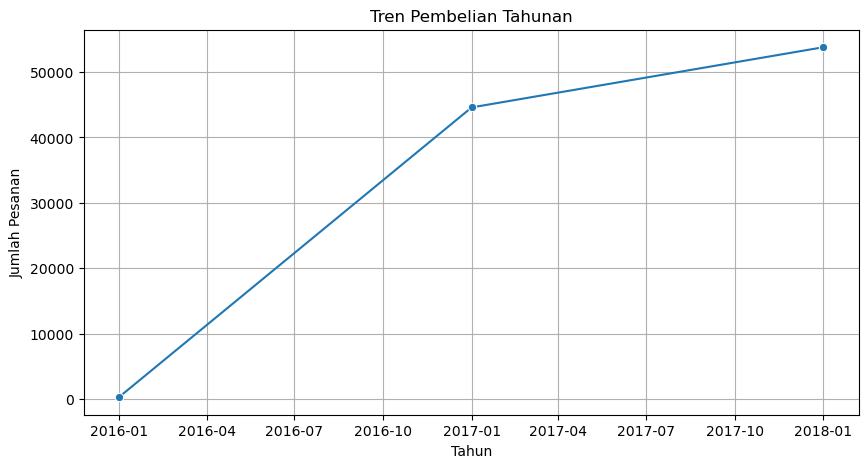

In [111]:
yearly_orders = all_dataset_df.groupby(all_dataset_df['order_purchase_timestamp'].dt.to_period("Y")).order_id.nunique()

plt.figure(figsize=(10, 5))
yearly_orders.index = yearly_orders.index.to_timestamp()
sns.lineplot(x=yearly_orders.index, y=yearly_orders.values, marker='o')
plt.title('Tren Pembelian Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

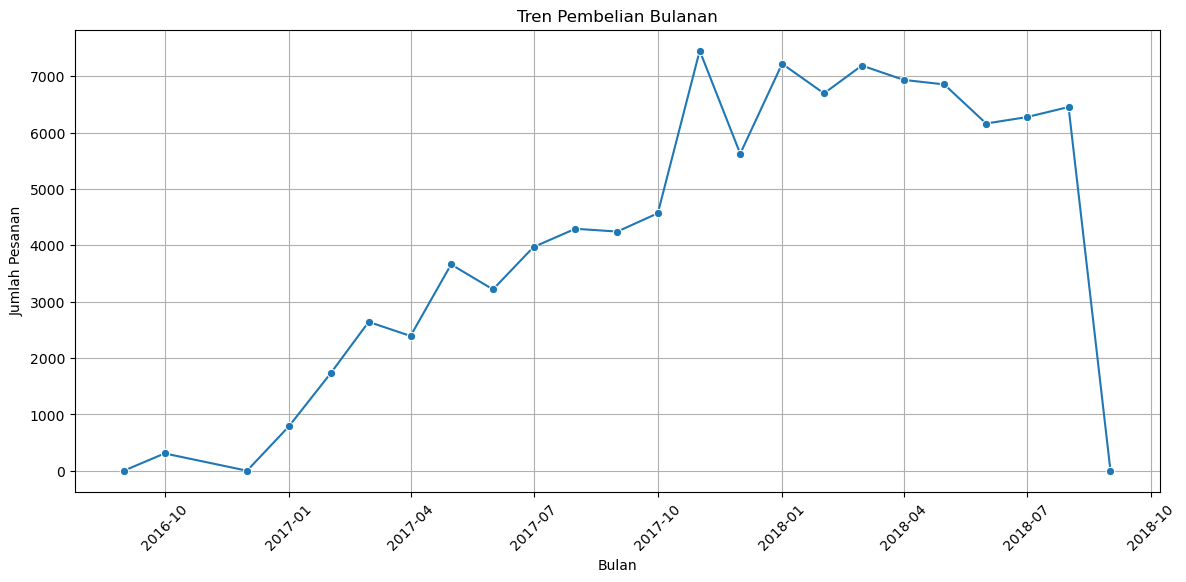

In [112]:
monthly_orders = all_dataset_df.groupby(all_dataset_df['order_purchase_timestamp'].dt.to_period("M")).order_id.nunique()

plt.figure(figsize=(14, 6))
monthly_orders.index = monthly_orders.index.to_timestamp()
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o')
plt.title('Tren Pembelian Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

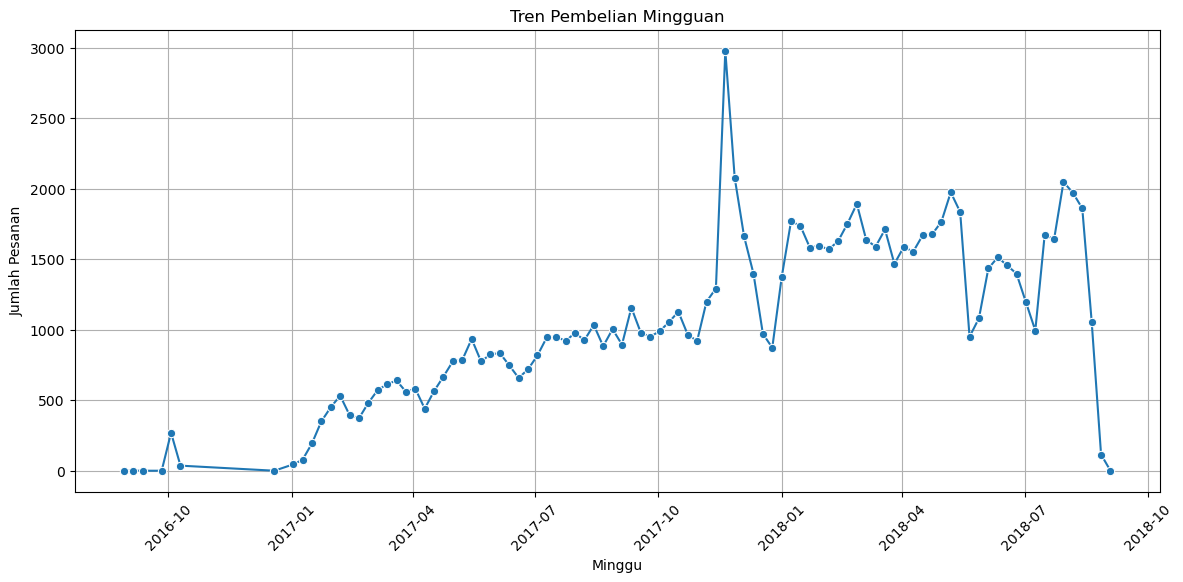

In [113]:
weekly_orders = all_dataset_df.groupby(all_dataset_df['order_purchase_timestamp'].dt.to_period("W")).order_id.nunique()

plt.figure(figsize=(14, 6))
weekly_orders.index = weekly_orders.index.to_timestamp()
sns.lineplot(x=weekly_orders.index, y=weekly_orders.values, marker='o')
plt.title('Tren Pembelian Mingguan')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

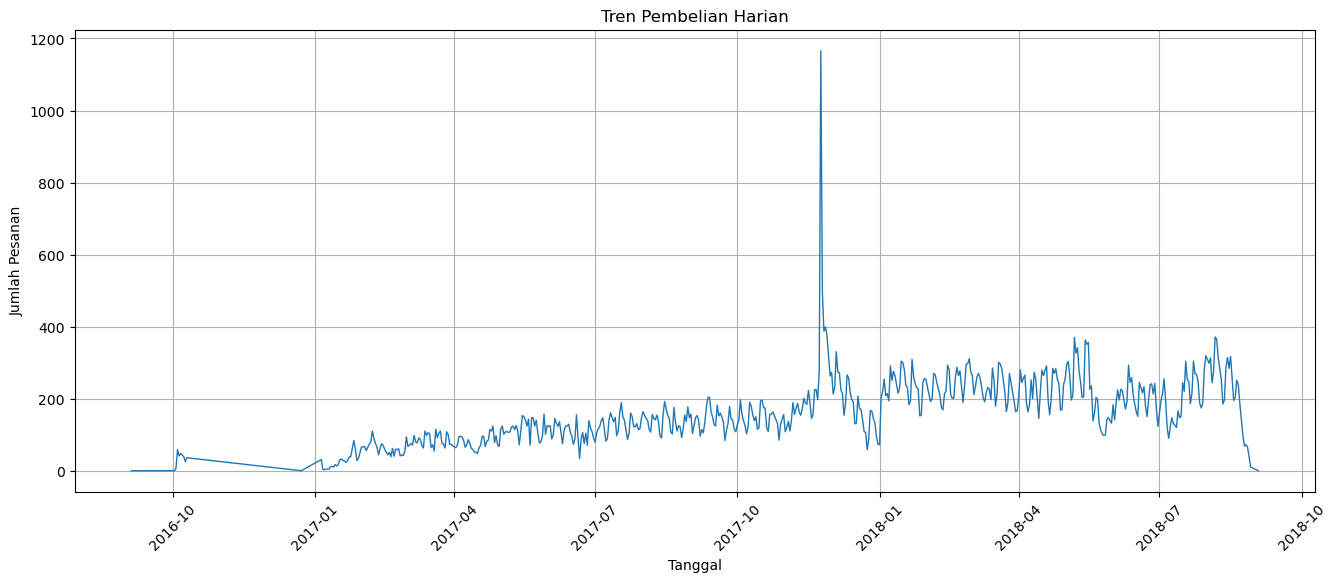

In [114]:
daily_orders = all_dataset_df.groupby(all_dataset_df['order_purchase_timestamp'].dt.date).order_id.nunique()

plt.figure(figsize=(16, 6))
sns.lineplot(x=daily_orders.index, y=daily_orders.values, linewidth=1)
plt.title('Tren Pembelian Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Apakah ada kategori produk tertentu yang paling sering dibeli?

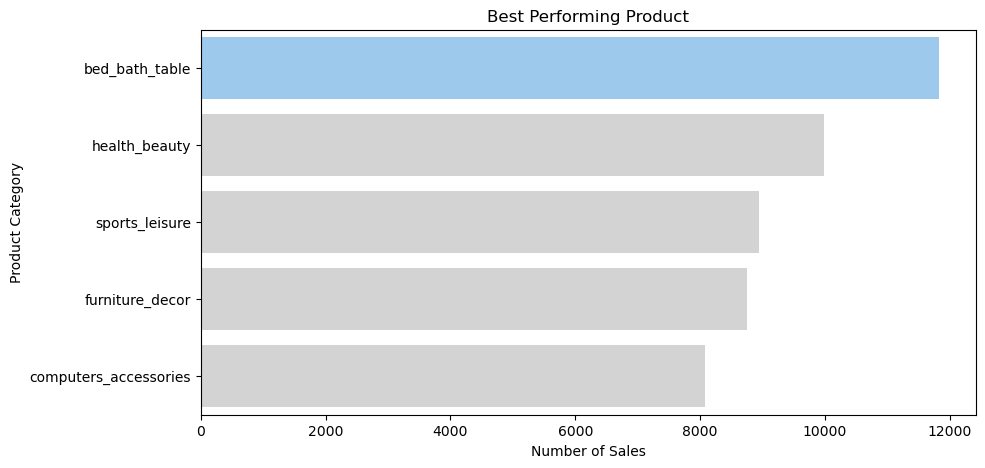

In [93]:
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
    
# Kategori terlaris
top_categories = all_dataset_df['product_category_name_english'].value_counts().head(5)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette=colors, hue=None, legend=False, ax=ax)
ax.set_ylabel("Product Category")
ax.set_xlabel("Number of Sales")
ax.set_title("Best Performing Product", loc="center")
plt.show()

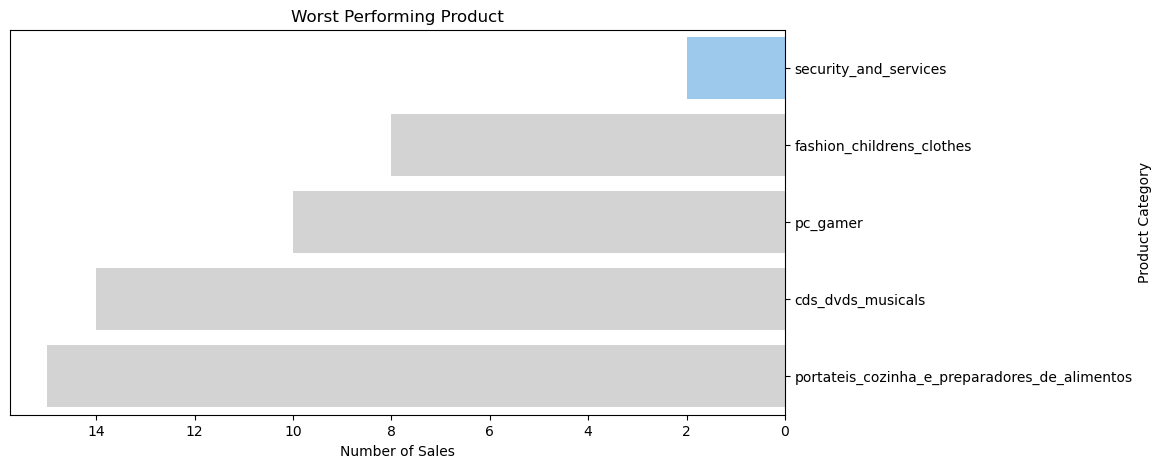

In [94]:
# Kategori kurang laris (dengan potongan label)
bottom_categories = all_dataset_df['product_category_name_english'].value_counts().sort_values().head(5)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=bottom_categories.values, y=bottom_categories.index, palette=colors, hue=None, legend=False, ax=ax)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.invert_xaxis()
ax.set_ylabel("Product Category")
ax.set_xlabel("Number of Sales")
ax.set_title("Worst Performing Product", loc="center")
plt.show()


### Pertanyaan 3: Apakah ada hubungan antara tren pembelian dan lokasi?

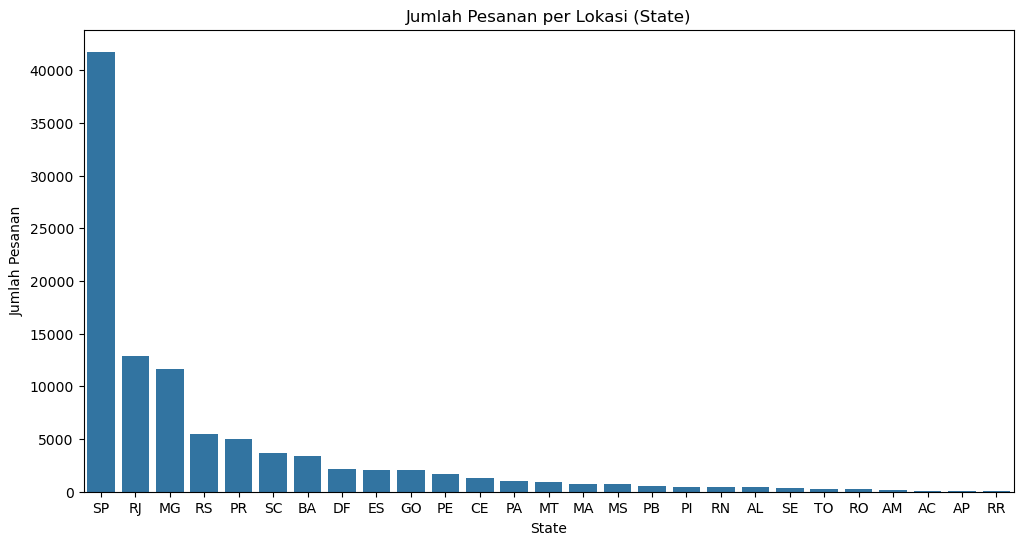

In [95]:
# Hitung jumlah pesanan per negara bagian
state_orders = all_dataset_df.groupby('customer_state').order_id.nunique().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=state_orders.index, y=state_orders.values)
plt.title('Jumlah Pesanan per Lokasi (State)')
plt.xlabel('State')
plt.ylabel('Jumlah Pesanan')
plt.show()


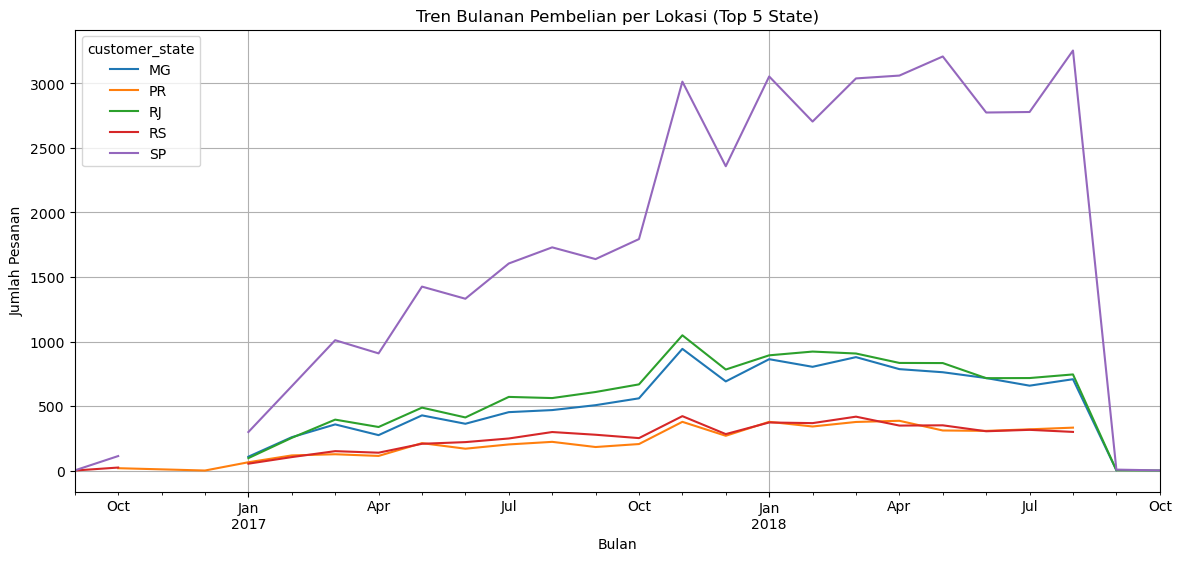

In [96]:
# Tambahkan kolom bulan
all_dataset_df['order_month'] = all_dataset_df['order_purchase_timestamp'].dt.to_period('M')

# Ambil 5 state teratas
top_states = state_orders.head(5).index

# Filter dan hitung pesanan per bulan untuk top states
state_monthly = all_dataset_df[all_dataset_df['customer_state'].isin(top_states)]
state_trend = state_monthly.groupby(['order_month', 'customer_state']).order_id.nunique().unstack()

# Visualisasi
state_trend.plot(figsize=(14, 6), title='Tren Bulanan Pembelian per Lokasi (Top 5 State)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

### Pertanyaan 4: Apakah ada hubungan antara metode pembayaran dengan total nilai transaksi?

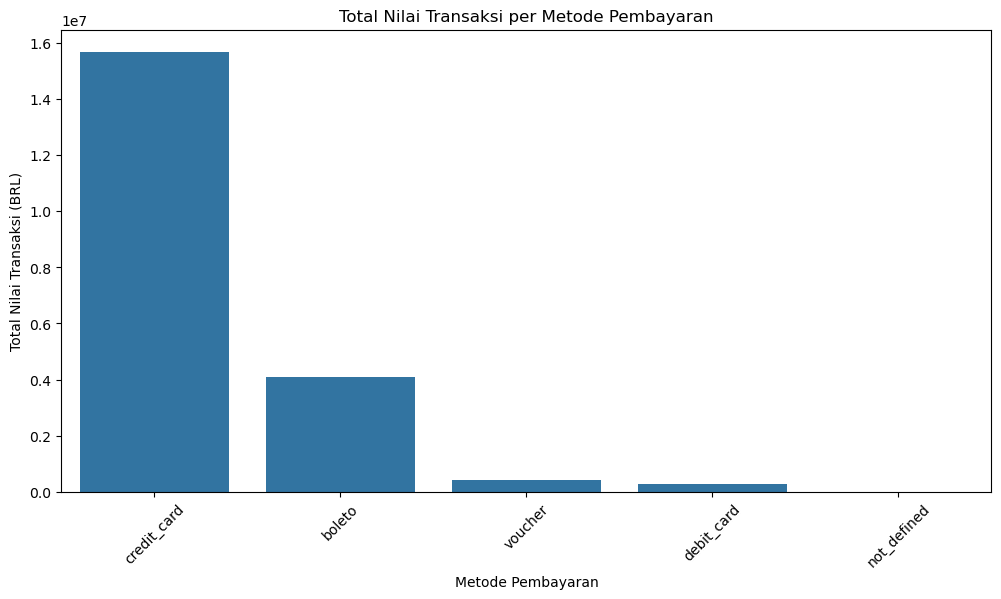

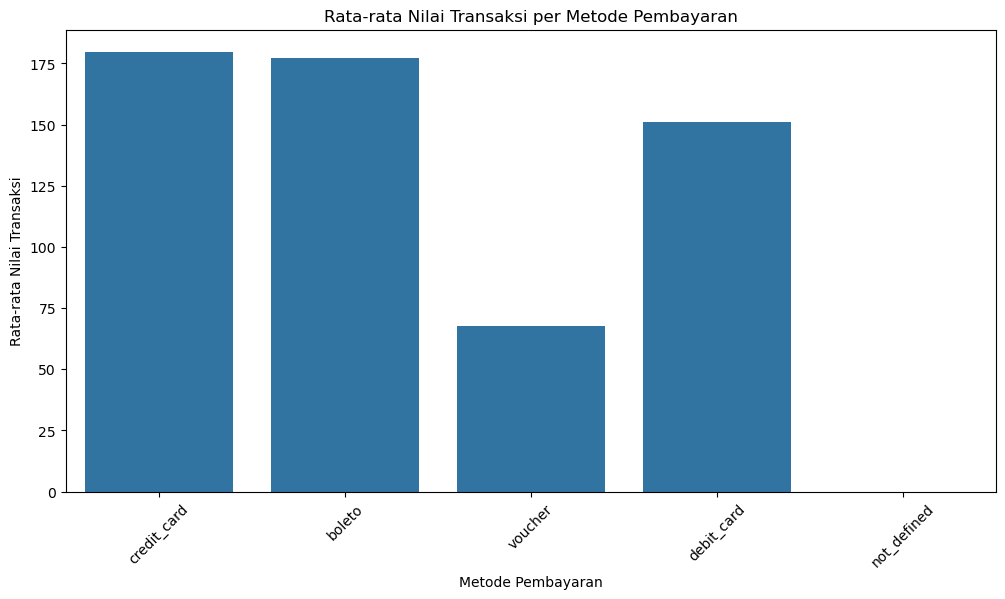

In [97]:
# Hitung total transaksi dan rata-rata per metode pembayaran
payment_summary = all_dataset_df.groupby('payment_type')['payment_value'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)

# Visualisasi total nilai transaksi
plt.figure(figsize=(12, 6))
sns.barplot(x=payment_summary.index, y=payment_summary['sum'])
plt.title('Total Nilai Transaksi per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Nilai Transaksi (BRL)')
plt.xticks(rotation=45)
plt.show()

# Visualisasi rata-rata transaksi
plt.figure(figsize=(12, 6))
sns.barplot(x=payment_summary.index, y=payment_summary['mean'])
plt.title('Rata-rata Nilai Transaksi per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Nilai Transaksi')
plt.xticks(rotation=45)
plt.show()


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

## Pembuatan RFM Score dan Segmentasi

In [ ]:

# Hitung skor RFM
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
rfm_df['f_score'] = pd.qcut(rfm_df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])
rfm_df['rfm_score'] = rfm_df[['r_score', 'f_score', 'm_score']].sum(axis=1).astype(int)

# Segmentasi berdasarkan skor total
def segment_customer(score):
    if score >= 8:
        return 'Gold'
    elif score >= 6:
        return 'Silver'
    elif score >= 4:
        return 'Bronze'
    else:
        return 'Inactive'

rfm_df['segment'] = rfm_df['rfm_score'].apply(segment_customer)


## Distribusi Jumlah Pelanggan per Segmen

In [ ]:

segment_order = ['Gold', 'Silver', 'Bronze', 'Inactive']
segment_counts = rfm_df['segment'].value_counts().reindex(segment_order).reset_index()
segment_counts.columns = ['Segment', 'Jumlah Customer']

plt.figure(figsize=(10, 5))
sns.barplot(data=segment_counts, x='Segment', y='Jumlah Customer',
            palette=['#FFD700', '#999999', '#CD7F32', '#000000'])
plt.title("Jumlah Customer per Segmen")
plt.xlabel("Segment")
plt.ylabel("Jumlah Customer")
plt.show()


## Tren Order Bulanan Berdasarkan Segmen

In [ ]:

all_dataset_df['order_month'] = all_dataset_df['order_purchase_timestamp'].dt.to_period('M')
main_with_segment = all_dataset_df.merge(rfm_df[['customer_id', 'segment']], on='customer_id', how='left')

monthly_segment_orders = (
    main_with_segment.groupby(['order_month', 'segment'])['order_id']
    .nunique()
    .unstack()
    .fillna(0)
)
monthly_segment_orders.index = monthly_segment_orders.index.to_timestamp()

segment_colors = {
    'Gold': '#FFD700',
    'Silver': '#707070',
    'Bronze': '#CD7F32',
    'Inactive': '#000000'
}

plt.figure(figsize=(12, 5))
for segment in monthly_segment_orders.columns:
    plt.plot(monthly_segment_orders.index,
             monthly_segment_orders[segment],
             label=segment,
             color=segment_colors[segment],
             marker='o')
plt.title("Tren Order Bulanan Berdasarkan Segmen Pelanggan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.legend(title="Segment")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## Distribusi Produk Berdasarkan Segmentasi RFM

In [ ]:

selected_segment = 'Gold'  # Ganti sesuai kebutuhan
product_type = 'Terlaris'  # Atau 'Kurang Laku'

main_with_segment = all_dataset_df.merge(rfm_df[['customer_id', 'segment']], on='customer_id', how='left')
segment_df = main_with_segment[main_with_segment['segment'] == selected_segment]

product_counts = (
    segment_df['product_category_name_english']
    .value_counts()
    .dropna()
)

if product_type == 'Terlaris':
    product_counts = product_counts.head(10)
else:
    product_counts = product_counts.sort_values(ascending=True).head(10)

highlight_color = "#90CAF9"
bar_colors = [highlight_color] + ['#D3D3D3'] * (len(product_counts) - 1)

plt.figure(figsize=(10, 5))
sns.barplot(x=product_counts.values, y=product_counts.index, palette=bar_colors)
plt.title(f"{product_type} - Segmen {selected_segment}")
plt.xlabel("Jumlah Order")
plt.ylabel("Kategori Produk")
plt.show()
